# Her er en test!

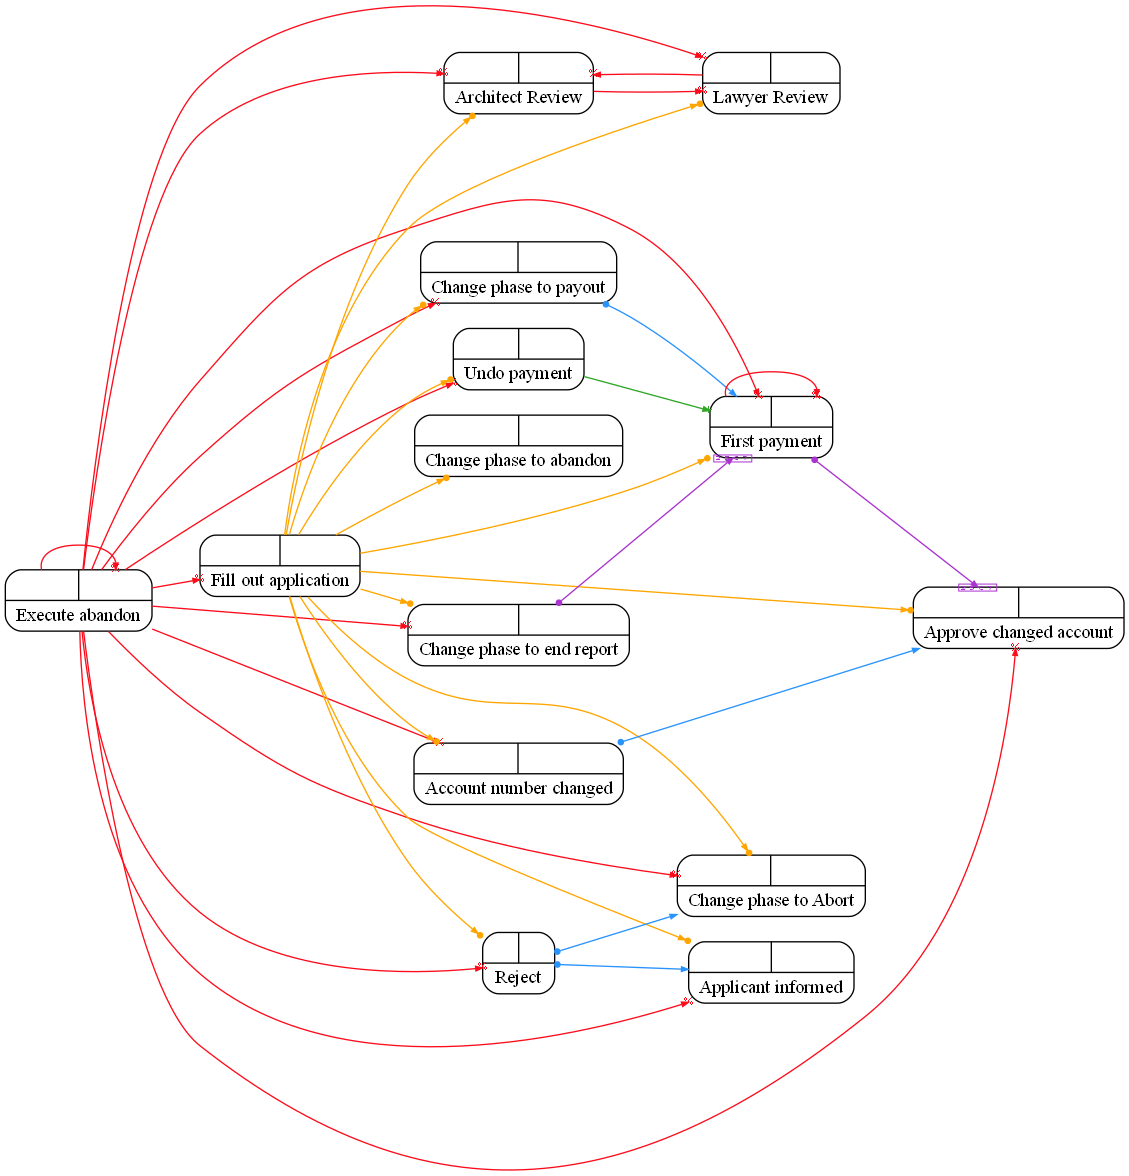

In [1]:
import pm4py
from pm4py.objects.dcr.nested.obj import NestedDcrGraph
graph = NestedDcrGraph()

events = [
    "Fill out application", "Architect Review", "Lawyer Review", "Reject", "Applicant informed",
    "Change phase to Abort", "First payment", "Undo payment", "Account number changed",
    "Approve changed account", "Change phase to payout", "Change phase to end report",
    "Execute abandon", "Change phase to abandon",
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

# rule 1
for event in events[1:]:
    graph.conditions[event] = ["Fill out application"]
graph.conditions["Execute abandon"] = [] # for rule 9

# rule 2
# covered under rule 1

# rule 3
graph.excludes["Lawyer Review"] = ["Architect Review"]
graph.excludes["Architect Review"] = ["Lawyer Review"]

# rule 4
graph.responses["Reject"] = ["Applicant informed", "Change phase to Abort"]

# rule 5
graph.excludes["First payment"] = ["First payment"]
graph.includes["Undo payment"] = ["First payment"]

# rule 6
graph.responses["Account number changed"] = ["Approve changed account"]
graph.milestones["First payment"] = ["Approve changed account"]

# rule 7
graph.responses["Change phase to payout"] = ["First payment"]

# rule 8
graph.milestones["Change phase to end report"] = ["First payment"]

# rule 9
graph.excludes["Execute abandon"] = events[:-1]


# graph.nested["super"] = ["sub1", "sub2"]

# graph.nested["sub1"] = ["sub3"]

# graph.nested["super"] = ["sub2"]


pm4py.view_dcr(graph)